In [30]:
import tifffile as tf
from scipy import ndimage

import numpy as np
import pandas as pd
import numpy.polynomial.polynomial as P

import os

import glob
from importlib import reload

import warnings
warnings.filterwarnings( "ignore")
from matplotlib import pyplot as plt
%matplotlib inline

import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [36]:
src = '../hpcc/'
wsrc = src + 'clean/'
tsrc = src + 'watershed/'
dst = '../figs/'
idname = '2014SBa'
rownum = 5
treenum = 48
nutnum = 9

bname = idname + '_R{}_T{}'.format(rownum, treenum)
fname = bname + '_{:03d}'.format(nutnum)
print(fname)

wdst = dst + bname + '/'
if not os.path.isdir(wdst):
    os.makedirs(wdst)
print(wdst)

2014SBa_R5_T48_009
../figs/2014SBa_R5_T48/


In [37]:
img = tf.imread(wsrc + bname + '/' + fname + '.tif')
tissuefiles = tsrc + bname + '/' + fname + '_'
air  = tf.imread(tissuefiles + 'air.tif')
meat = tf.imread(tissuefiles + 'meat.tif')
shell= tf.imread(tissuefiles + 'shell.tif')
vein = tf.imread(tissuefiles + 'vein.tif')
#protrusion = tf.imread(tissuefiles + 'protrusion.tif')

watershed = np.zeros_like(img)
watershed[img > 0] = 3
watershed[meat > 0] += 1
watershed[shell > 0] += 2
watershed[vein > 0] += 3
watershed[air > 0] += 4
watershed.max()

N = 49
xx = np.linspace(5,img.shape[0]-5,N).astype(np.uint)
yy = np.linspace(5,img.shape[1]-5,N).astype(np.uint)
zz = np.linspace(5,img.shape[2]-5,N).astype(np.uint)

# Go-through slices

In [6]:
fs = 25
k = 150

for k in range(N):
    ss = np.s_[xx[k],:,:]

    fig, ax = plt.subplots(1,5,figsize=(16,4), sharex=True, sharey=True, facecolor='k')
    ax = np.atleast_1d(ax).flatten()

    i = 0
    ax[i].imshow(img[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(watershed[ss], cmap='magma', origin='lower', vmax=7, vmin=0); i += 1
    ax[i].imshow(shell[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(meat[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(vein[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1

    for i in range(len(ax)):
        ax[i].axis('off')

    fig.suptitle(fname + ' (X plane)', fontsize=fs, color='w')
    fig.tight_layout()

    filename = wdst + fname + '_x_{:04d}'.format(k)
    plt.savefig(filename + '.jpg', format='jpg', bbox_inches='tight', dpi=72, pil_kwargs={'optimize':True})
    plt.close()
    
    ss = np.s_[:,yy[k],:]

    fig, ax = plt.subplots(1,5,figsize=(16,4), sharex=True, sharey=True, facecolor='k')
    ax = np.atleast_1d(ax).flatten()

    i = 0
    ax[i].imshow(img[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(watershed[ss], cmap='magma', origin='lower', vmax=7, vmin=0); i += 1
    ax[i].imshow(shell[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(meat[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(vein[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1

    for i in range(len(ax)):
        ax[i].axis('off')

    fig.suptitle(fname + ' (Y plane)', fontsize=fs, color='w')
    fig.tight_layout()

    filename = wdst + fname + '_y_{:04d}'.format(k)
    plt.savefig(filename + '.jpg', format='jpg', bbox_inches='tight', dpi=72, pil_kwargs={'optimize':True})
    plt.close()
    
    ss = np.s_[:,:,zz[k]]

    fig, ax = plt.subplots(1,5,figsize=(16,4), sharex=True, sharey=True, facecolor='k')
    ax = np.atleast_1d(ax).flatten()

    i = 0
    ax[i].imshow(img[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(watershed[ss], cmap='magma', origin='lower', vmax=7, vmin=0); i += 1
    ax[i].imshow(shell[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(meat[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(vein[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1

    for i in range(len(ax)):
        ax[i].axis('off')

    fig.suptitle(fname + ' (Z plane)', fontsize=fs, color='w')
    fig.tight_layout()

    filename = wdst + fname + '_z_{:04d}'.format(k)
    plt.savefig(filename + '.jpg', format='jpg', bbox_inches='tight', dpi=72, pil_kwargs={'optimize':True})
    plt.close()

In [38]:
fs = 21
k = 35

for k in range(len(xx)):
    fig, ax = plt.subplots(3,5,figsize=(16,10), sharex=False, sharey=False, facecolor='k')
    ax = np.atleast_1d(ax).flatten()
    
    i = 0
    ss = np.s_[xx[k],:,:]
    ax[i].imshow(img[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(watershed[ss], cmap='magma', origin='lower', vmax=7, vmin=0); i += 1
    ax[i].imshow(shell[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(meat[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(vein[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1

    ss = np.s_[:,yy[k],:]
    ax[i].imshow(img[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(watershed[ss], cmap='magma', origin='lower', vmax=7, vmin=0); i += 1
    ax[i].imshow(shell[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(meat[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(vein[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1

    ss = np.s_[:,:,zz[k]]
    ax[i].imshow(img[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(watershed[ss], cmap='magma', origin='lower', vmax=7, vmin=0); i += 1
    ax[i].imshow(shell[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(meat[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(vein[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1

    for i in range(len(ax)):
        ax[i].get_xaxis().set_ticks([])
        ax[i].get_yaxis().set_ticks([])
        for spine in ax[i].spines.values():
            spine.set_visible(False)
        ax[i].set_aspect('equal')

    ax[ 0].set_ylabel('X plane', color='w', fontsize=fs)
    ax[ 5].set_ylabel('Y plane', color='w', fontsize=fs)
    ax[10].set_ylabel('Z plane', color='w', fontsize=fs)

    ax[10].set_xlabel('Whole', color='w', fontsize=fs)
    ax[11].set_xlabel('Watershed', color='w', fontsize=fs)
    ax[12].set_xlabel('Shell', color='w', fontsize=fs)
    ax[13].set_xlabel('Kernel', color='w', fontsize=fs)
    ax[14].set_xlabel('Packing', color='w', fontsize=fs)

    fig.suptitle(fname, fontsize=25, color='w')
    fig.tight_layout()

    filename = wdst + fname + '_w_{:04d}'.format(k)
    plt.savefig(filename + '.jpg', format='jpg', bbox_inches='tight', dpi=72, pil_kwargs={'optimize':True})
    plt.close()

# Manuscript composition

In [12]:
bname0 = '2011SBb_R3_T60'
nutnum0 = 4
fname0 = bname0 + '_{:03d}'.format(nutnum0)

bname1 = '2014SBa_R5_T49'
nutnum1 = 8
fname1 = bname1 + '_{:03d}'.format(nutnum1)

src = '../hpcc/'
wsrc = src + 'clean/'
tsrc = src + 'watershed/'
dst = '../../writing/walnut_figs/'

In [13]:
wdstn0 = wsrc + bname0 + '/normalization/'
wdstn1 = wsrc + bname1 + '/normalization/'

zerofile = wdstn0 + 'clean_zeroes{:03d}.csv'.format(nutnum0)
cero = np.loadtxt(zerofile, dtype=int)

raw0 = tf.imread('../raw/redo/' + fname0 + '.tif')//256
raw0 = raw0.astype(np.uint8)
raw0 = raw0[cero[1]:cero[4], cero[2]:cero[5], cero[0]:cero[3]]

zerofile = wdstn1 + 'clean_zeroes{:03d}.csv'.format(nutnum1)
cero = np.loadtxt(zerofile, dtype=int)

raw1 = tf.imread('../raw/'+ bname1 + '/' + '{:03d}.tif'.format(nutnum1))//256
raw1 = raw1.astype(np.uint8)
raw1 = raw1[cero[1]:cero[4], cero[2]:cero[5], cero[0]:cero[3]]

In [37]:
img0 = tf.imread(wsrc + bname0 + '/' + fname0 + '.tif')
tissuefiles = tsrc + bname0 + '/' + fname0 + '_'
air  = tf.imread(tissuefiles + 'air.tif')
meat = tf.imread(tissuefiles + 'meat.tif')
shell= tf.imread(tissuefiles + 'shell.tif')
vein = tf.imread(tissuefiles + 'vein.tif')
protrusion0 = tf.imread(tissuefiles + 'protrusion.tif')

watershed0 = np.zeros_like(img0)
#watershed0[img0 > 0] = 1
watershed0[meat > 0] += 1
watershed0[shell > 0] += 2
watershed0[vein > 0] += 3
watershed0[air > 0] += 4
print(watershed0.max())

#####

img1 = tf.imread(wsrc + bname1 + '/' + fname1 + '.tif')
tissuefiles = tsrc + bname1 + '/' + fname1 + '_'
air  = tf.imread(tissuefiles + 'air.tif')
meat = tf.imread(tissuefiles + 'meat.tif')
shell= tf.imread(tissuefiles + 'shell.tif')
vein = tf.imread(tissuefiles + 'vein.tif')
protrusion1 = tf.imread(tissuefiles + 'protrusion.tif')

watershed1 = np.zeros_like(img1)
#watershed1[img1 > 0] = 1
watershed1[meat > 0] += 1
watershed1[shell > 0] += 2
watershed1[vein > 0] += 3
watershed1[air > 0] += 4
print(watershed1.max())

4
4


In [64]:
from matplotlib import cm
viridis = cm.get_cmap('inferno', 10)
print(np.asarray(viridis(10))*255)

[252.03231 254.58282 164.45562 255.     ]


In [84]:
protrusion0[protrusion0 == 3] = 1
protrusion0[protrusion0 == 5] = 2
protrusion0[protrusion0 >  5] = 3

protrusion1[protrusion1 == 3] = 1
protrusion1[protrusion1 == 5] = 2
protrusion1[protrusion1 >  5] = 3

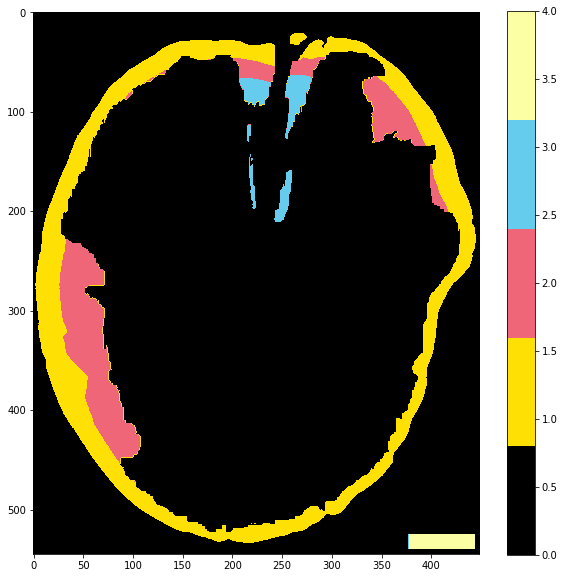

In [99]:
cmap = ListedColormap(["k", "#ee6677", '#ffe005', "#228833", '#e8e8e8', viridis(10)])
cmap2 = ListedColormap(["k", '#ffe005', '#ee6677', '#66ccee', viridis(10)])

k = 240
fig, ax = plt.subplots(1,1,figsize=(10,10), sharex=False, sharey=False, facecolor='w')
i = 0
bar = np.s_[-20:-5, -72:-5]
ss = np.s_[:,:,k]; j = 0
tprot = protrusion0[ss].copy(); tprot[bar] = 4
ps = ax.imshow(tprot, cmap=cmap2, vmax=4, vmin=0); i += 1
fig.colorbar(ps);

../../writing/walnut_figs/2011SBb_R3_T60_004_vs_2014SBa_R5_T49_008_240_barless


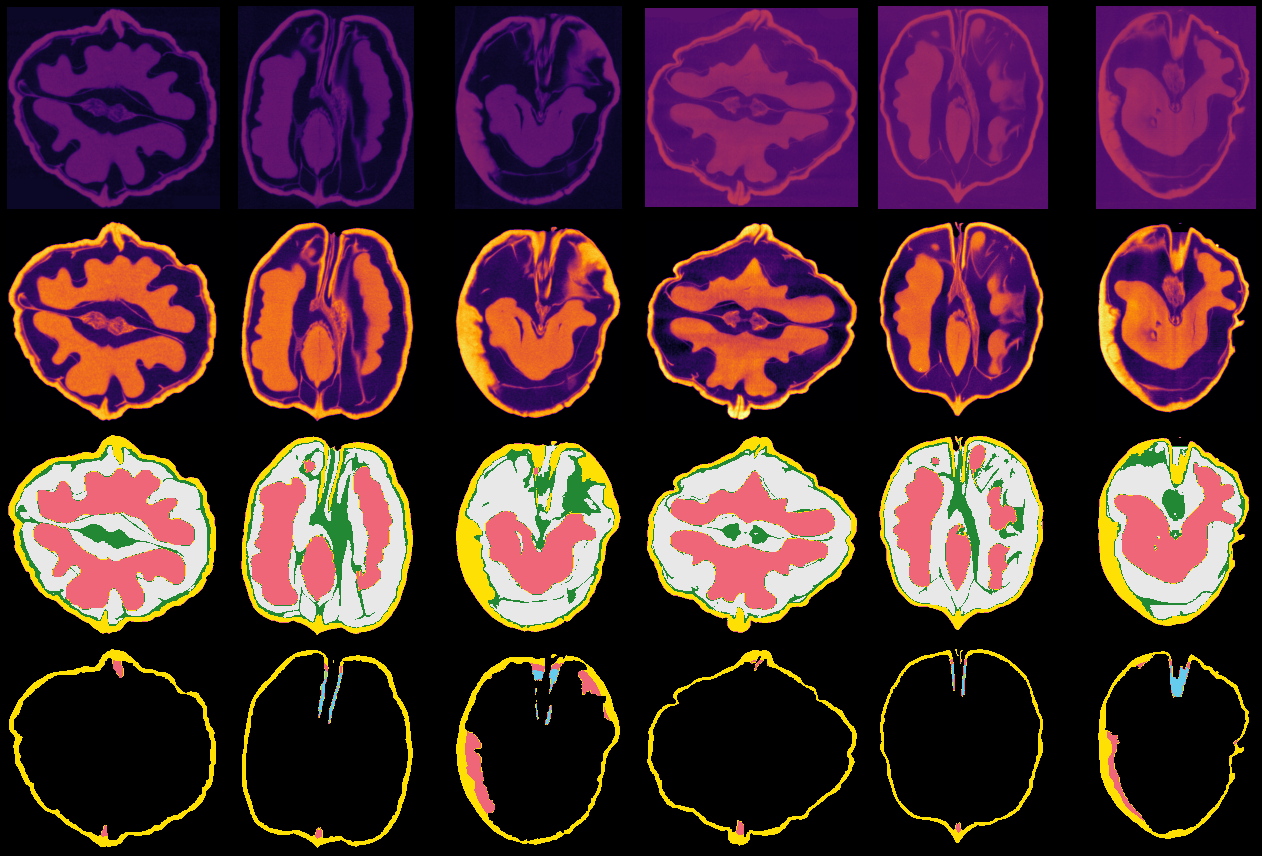

In [106]:
k = 240
fig, ax = plt.subplots(4,6,figsize=(18,12), sharex=False, sharey=False, facecolor='k')
i = 0

bar = np.s_[-20:-5, -72:-5]

for j,ss in enumerate([np.s_[k,:,:], np.s_[:,k,:], np.s_[:,:,k]]):
    traw = raw0[ss].copy();
    ax[0,j].imshow(traw, cmap='inferno', vmax=255, vmin=0)
    timg = img0[ss].copy(); timg[bar] = 0
    ax[1,j].imshow(timg, cmap='inferno', vmax=255, vmin=0)
    twater = watershed0[ss].copy(); twater[bar] = 0
    ax[2,j].imshow(twater, cmap=cmap, vmax=5, vmin=0)
    tprot = protrusion0[ss].copy(); tprot[bar] = 0
    ax[3,j].imshow(tprot, cmap=cmap2, vmax=4, vmin=0)

for i,ss in enumerate([np.s_[k,:,:], np.s_[:,k,:], np.s_[:,:,k]]):
    j = i+3
    traw = raw1[ss].copy();
    ax[0,j].imshow(traw, cmap='inferno', vmax=255, vmin=0);
    timg = img1[ss].copy(); timg[bar] = 0
    ax[1,j].imshow(timg, cmap='inferno', vmax=255, vmin=0);
    twater = watershed1[ss].copy(); twater[bar] = 0
    ax[2,j].imshow(twater, cmap=cmap, vmax=5, vmin=0);
    tprot = protrusion1[ss].copy(); tprot[bar] = 0
    ax[3,j].imshow(tprot, cmap=cmap2, vmax=4, vmin=0);

ax = np.atleast_1d(ax).flatten()
for i in range(len(ax)):
    ax[i].set_aspect('equal')
    ax[i].axis('off')
#fig.suptitle(fname, fontsize=25);
fig.tight_layout();

filename = dst + fname0 + '_vs_' + fname1 + '_{:03d}_barless'.format(k)
print(filename)
plt.savefig(filename + '.jpg', format='jpg', bbox_inches='tight', dpi=250, pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight', dpi=250)
#plt.close()

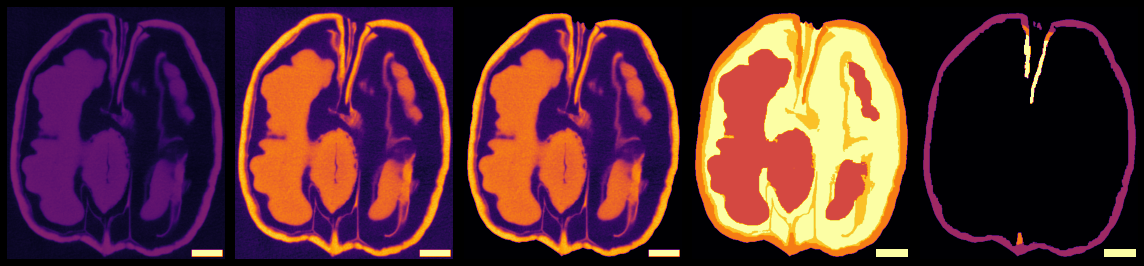

In [90]:
k = 250
ss = np.s_[:,k,:]
bar = np.s_[-20:-5, -72:-5]

fig, ax = plt.subplots(1,5,figsize=(16,8), facecolor='k')
i = 0
traw = raw[ss].copy(); traw[bar] = 255
ax[i].imshow(traw, cmap='inferno', vmax=255, vmin=0); i += 1

tnorm = norm[ss].copy(); tnorm[bar] = 255
ax[i].imshow(tnorm, cmap='inferno', vmax=255, vmin=0); i += 1

timg = img[ss].copy(); timg[bar] = 255
ax[i].imshow(timg, cmap='inferno', vmax=255, vmin=0); i += 1

twater = watershed[ss].copy(); twater[bar] = 255
ax[i].imshow(twater, cmap='inferno', vmax=7, vmin=0); i += 1

tprot = protrusion[ss].copy(); tprot[bar] = 255
ax[i].imshow(tprot, cmap='inferno', vmax=7, vmin=0); i += 1

for i in range(len(ax)):
    ax[i].set_aspect('equal')
    ax[i].axis('off')
#fig.suptitle(fname, fontsize=25);
fig.tight_layout();